In [246]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

In [118]:
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [119]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [120]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [121]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [122]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [123]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [124]:
sum(city_data_df['type']=='Urban')

66

In [125]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [126]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [127]:
pyber_data_df=pd.merge(ride_data_df, city_data_df, how='left', on=['city','city'])
pyber_data_df.head(15)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [128]:
urban_cities_df=pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [129]:
suburban_cities_df=pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df=pyber_data_df[pyber_data_df['type']=='Rural']

In [130]:
urban_ride_count= urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [131]:
suburban_ride_count=suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count=rural_cities_df.groupby(['city']).count()['ride_id']

In [132]:
urban_fare= urban_cities_df.groupby(['city']).mean()['fare']
urban_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [133]:
suburban_fare=suburban_cities_df.groupby(['city']).mean()['fare']
rural_fare=rural_cities_df.groupby(['city']).mean()['fare']

In [134]:
urban_driver_count= urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [135]:
suburban_driver_count=suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count=rural_cities_df.groupby(['city']).mean()['driver_count']

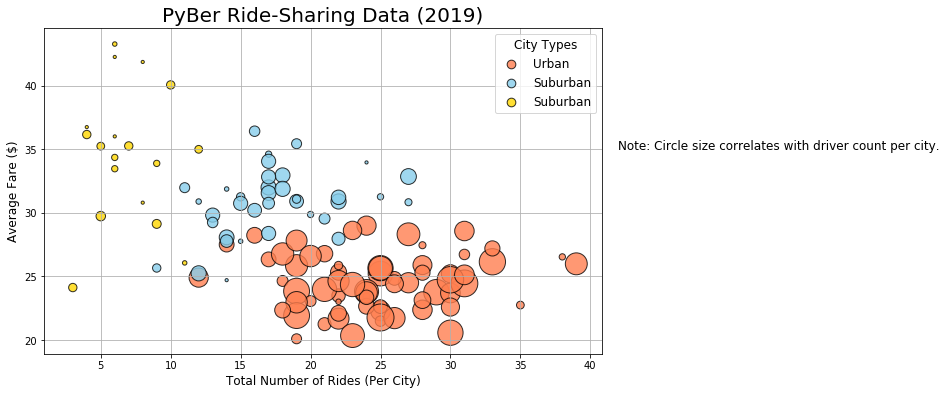

In [136]:
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count, urban_fare, color='coral', edgecolor='black', linewidths=1, alpha=0.8, s=10*urban_driver_count, label='Urban')
plt.scatter(suburban_ride_count, suburban_fare, c='skyblue', alpha=0.8, edgecolor='black', linewidth=1, s=10*suburban_driver_count, label='Suburban')
plt.scatter(rural_ride_count, rural_fare, c='gold', alpha=0.8, edgecolor='black', linewidth=1, s=10*rural_driver_count, label='Suburban')

plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)',fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)

plt.grid()

lgnd=plt.legend(fontsize=12,loc='best', mode='Expanded', scatterpoints=1, title='City Types')
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)

plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")


plt.savefig('Analysis/Fig1.png')

plt.show()

In [137]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [138]:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [139]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [140]:
mean_urban_ride_count=np.mean(urban_ride_count)
print(f'The mean is {mean_urban_ride_count:.2f}')

mode_urban_ride_count=sts.mode(urban_ride_count)
print(f'Mode: {mode_urban_ride_count}')

The mean is 24.62
Mode: ModeResult(mode=array([22]), count=array([7]))


In [141]:
urban_avg_fare= urban_cities_df.mean()['fare']
urban_avg_fare.round(2)

24.53

In [142]:
urban_median_fare= urban_cities_df.median()['fare']
urban_median_fare

24.64

In [143]:
urban_mode_fare= sts.mode(urban_cities_df['fare'])
print(f'Mode: {urban_mode_fare}')

Mode: ModeResult(mode=array([22.86]), count=array([5]))


In [144]:
urban_drivers=urban_cities_df['driver_count']
suburban_drivers=suburban_cities_df['driver_count']
rural_drivers=rural_cities_df['driver_count']

urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [145]:
mean_urban_driver=np.mean(urban_drivers)
print(f'The mean is {mean_urban_driver:.2f}.')

mode_urban_driver=sts.mode(urban_drivers)
print(f'Mean: {mode_urban_driver}.')

The mean is 36.68.
Mean: ModeResult(mode=array([39]), count=array([86])).


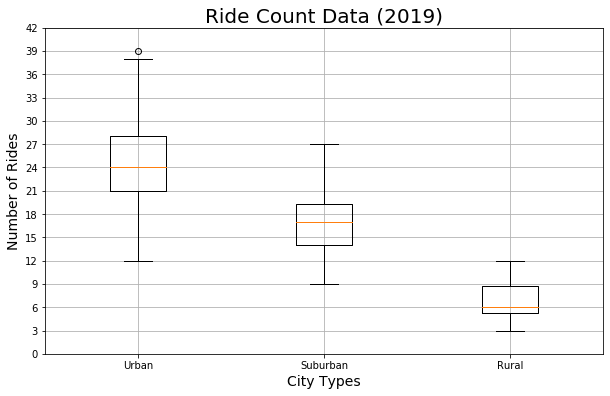

In [147]:
x_labels=['Urban','Suburban', 'Rural']
ride_count_data=[urban_ride_count,suburban_ride_count,rural_ride_count]
fig, ax=plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.set_yticks(np.arange(0,45, step=3))

ax.grid()
plt.savefig('Analysis/Fig2.png')
plt.show()



In [148]:
urban_city_outliner=urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outliner} has the highest rider count.')

West Angela has the highest rider count.


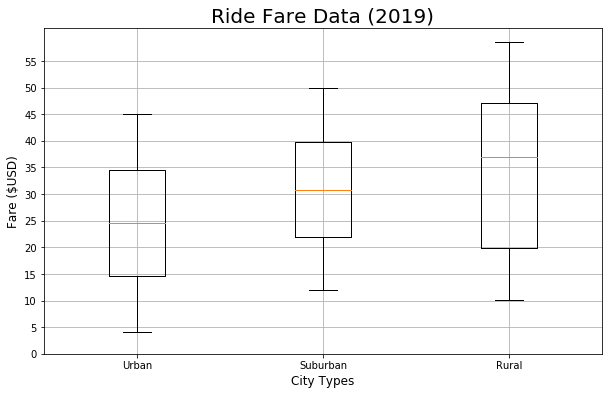

In [149]:
urban_fare_boxplot=urban_cities_df['fare']
suburban_fare_boxplot=suburban_cities_df['fare']
rural_fare_boxplot=rural_cities_df['fare']

x_labels=['Urban','Suburban', 'Rural']
ride_fare_data=[urban_fare_boxplot,suburban_fare_boxplot,rural_fare_boxplot]
fig, ax=plt.subplots(figsize=(10,6))
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_xlabel('City Types', fontsize=12)
ax.set_ylabel('Fare ($USD)', fontsize=12)
ax.set_yticks(np.arange(0,60, step=5))
ax.grid()

plt.savefig('Analysis/Fig3.png')
plt.show()

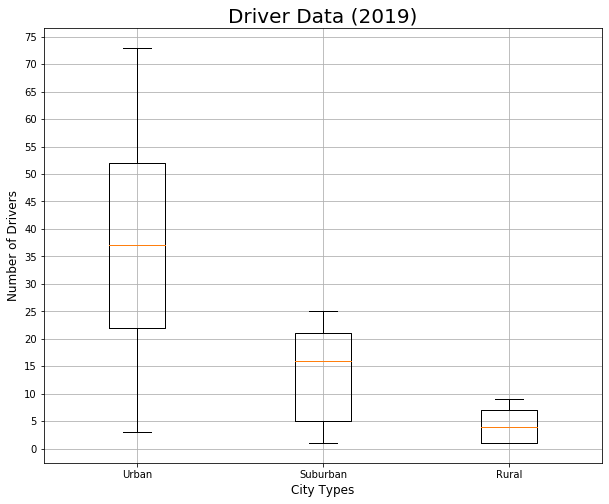

In [150]:
x_labels=['Urban','Suburban', 'Rural']
driver_data=[urban_drivers,suburban_drivers,rural_drivers]
fig, ax=plt.subplots(figsize=(10,8))
ax.boxplot(driver_data, labels=x_labels)
ax.set_title('Driver Data (2019)', fontsize=20)
ax.set_xlabel('City Types', fontsize=12)
ax.set_ylabel('Number of Drivers', fontsize=12)
ax.set_yticks(np.arange(0,80, step=5))
ax.grid()

plt.savefig('Analysis/Fig4.png')
plt.show()

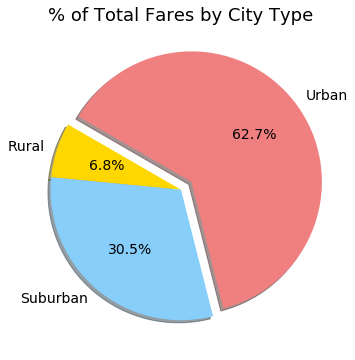

In [261]:
type_percents=100*pyber_data_df.groupby(['type']).sum()['fare']/pyber_data_df['fare'].sum()

plt.subplots(figsize=(10,6))
plt.pie(type_percents,
        labels=['Rural','Suburban','Urban'], 
        colors=['gold','lightskyblue','lightcoral'],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        startangle=150, shadow=True)
plt.title("% of Total Fares by City Type", fontsize=18)
mpl.rcParams['font.size']=14
plt.savefig("analysis/Fig5.png")

plt.show()

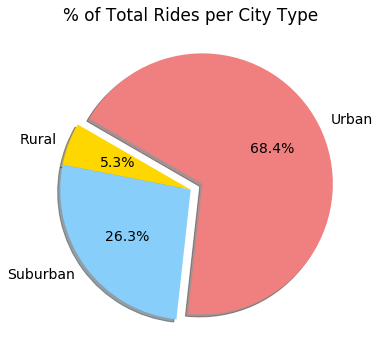

In [262]:
ride_percents=100*pyber_data_df.groupby(['type']).count()['ride_id']/pyber_data_df['ride_id'].count()

plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
        labels=['Rural','Suburban','Urban'], 
        colors=['gold','lightskyblue','lightcoral'],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        startangle=150,
        shadow=True)
plt.title('% of Total Rides per City Type')
mpl.rcParams['font.size']=14
plt.savefig("analysis/Fig6.png")
plt.show()

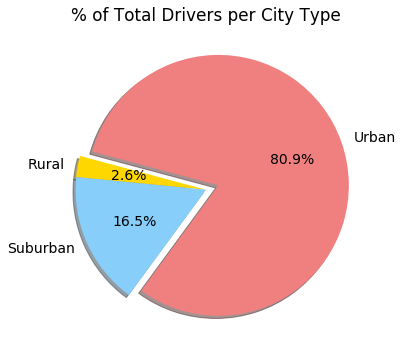

In [269]:
driver_percents=100*city_data_df.groupby(['type']).sum()['driver_count']/city_data_df['driver_count'].sum()

plt.subplots(figsize=(10,6))
plt.pie(driver_percents,
        labels=['Rural','Suburban','Urban'], 
        colors=['gold','lightskyblue','lightcoral'],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        startangle=165,
        shadow=True)
plt.title('% of Total Drivers per City Type')
mpl.rcParams['font.size']=14
plt.savefig("analysis/Fig7.png")
plt.show()